In [ ]:
 # Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install roboflow

from roboflow import Roboflow
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="zFQnSt2437Ig6aCAtSZ4", model_format="clip")
dataset = rf.workspace("yulia-pratiwi-45vut").project("derma").version(1).download(location="/content/Dermalysis")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/Dermalysis in clip:: 100%|██████████| 3495/3495 [00:01<00:00, 3459.94it/s]


In [ ]:
# cacar air
import os
folder_path = ('/content/Dermalysis/train/CacarAir')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
# Jamur Kuku
import os
folder_path = ('/content/Dermalysis/train/JamurKuku')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
# Jerawat
import os
folder_path = ('/content/Dermalysis/train/Jerawat')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
# Kurap
import os
folder_path = ('/content/Dermalysis/train/Kurap')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
# Kutu Air
import os
folder_path = ('/content/Dermalysis/train/Kutu Air')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
# from pathlib import Path
# image_dir = Path('/content/Dermalysis/train')
# test_data_path = "/content/Dermalysis/test"

# # Get filepaths and labels
# filepaths = list(image_dir.glob(r'**/*.jpg'))
# labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

from pathlib import Path
import os

# Directories
train_dir = Path('/content/Dermalysis/train')
test_dir = Path('/content/Dermalysis/test')

# Get filepaths and labels for training data
train_filepaths = list(train_dir.glob(r'**/*.jpg'))
train_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], train_filepaths))

# Get filepaths and labels for test data
test_filepaths = list(test_dir.glob(r'**/*.jpg'))
test_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], test_filepaths))

In [ ]:
# Import pandas
import pandas as pd

# Pastikan train_df sudah terpisah dengan benar
train_df = shuffle(train_df, random_state=1)

# Hitung jumlah data per kelas di train_df
class_counts_train = train_df['Label'].value_counts()
print("Jumlah data per kelas (train_df):")
print(class_counts_train)


Jumlah data per kelas (train_df):
Label
JamurKuku    531
Jerawat      516
KutuAir      508
Kurap        506
CacarAir     499
Name: count, dtype: int64


In [ ]:
# Directories
test_dir = Path('/content/Dermalysis/test')

# Get filepaths and labels for test data
test_filepaths = list(test_dir.glob(r'**/*.jpg'))
test_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], test_filepaths))

# Buat DataFrame untuk test data
test_df = pd.DataFrame({
    'Filepath': test_filepaths,
    'Label': test_labels
})

# Hitung jumlah data per kelas di test_df
class_counts_test = test_df['Label'].value_counts()
print("\nJumlah data per kelas (test_df):")
print(class_counts_test)



Jumlah data per kelas (test_df):
Label
CacarAir     61
Kurap        58
KutuAir      54
Jerawat      53
JamurKuku    52
Name: count, dtype: int64


In [ ]:
# Pastikan validasi_df sudah terpisah dengan benar
validasi_df = shuffle(validasi_df, random_state=1)

# Hitung jumlah data per kelas di validasi_df
class_counts_validasi = validasi_df['Label'].value_counts()
print("\nJumlah data per kelas (validasi_df):")
print(class_counts_validasi)



Jumlah data per kelas (validasi_df):
Label
KutuAir      137
Jerawat      132
Kurap        127
CacarAir     125
JamurKuku    120
Name: count, dtype: int64


In [ ]:
# Convert lists to pandas Series
train_filepaths = pd.Series(train_filepaths, name='Filepath').astype(str)
train_labels = pd.Series(train_labels, name='Label')

test_filepaths = pd.Series(test_filepaths, name='Filepath').astype(str)
test_labels = pd.Series(test_labels, name='Label')

# Concatenate filepaths and labels into DataFrames
train_df = pd.concat([train_filepaths, train_labels], axis=1)
test_df = pd.concat([test_filepaths, test_labels], axis=1)

# Shuffle the DataFrames
train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)

# Show the first 3 rows of each DataFrame
print("Train Data:")
print(train_df.head(3))

# print("\nTest Data:")
# print(test_df.head(3))

Train Data:
                                            Filepath    Label
0  /content/Dermalysis/train/Kurap/ringworm-1122-...    Kurap
1  /content/Dermalysis/train/Jerawat/acne-1153_jp...  Jerawat
2  /content/Dermalysis/train/KutuAir/images-8-_jp...  KutuAir


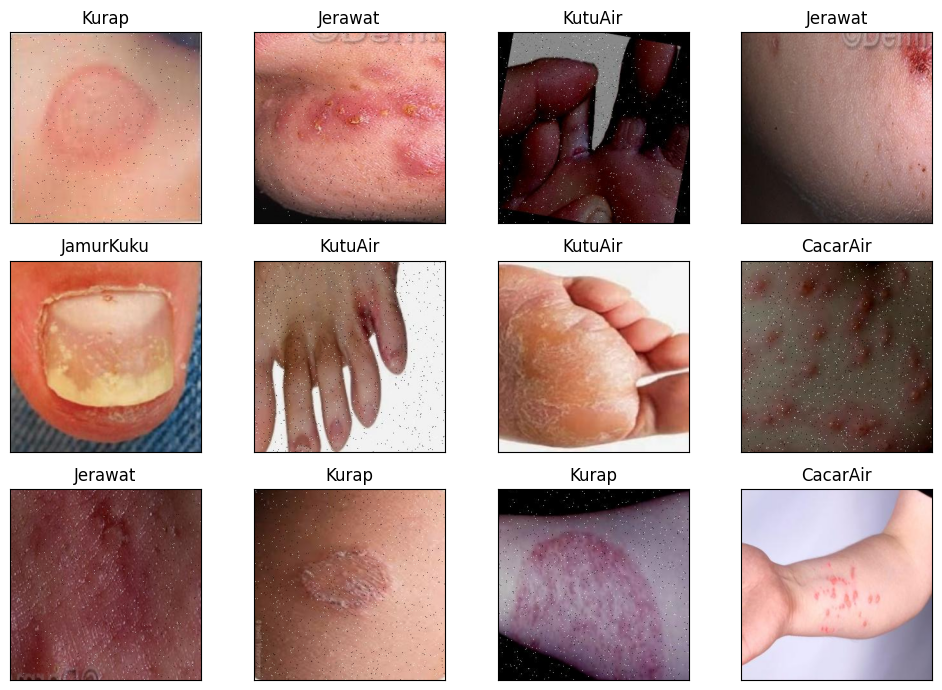

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Adjust this based on your actual DataFrame
image_df =  train_df

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                         subplot_kw={'xticks': [], 'yticks': []})

# Iterate through the first 12 images in the DataFrame
for i, ax in enumerate(axes.flat):
    filepath = image_df.Filepath[i]
    label = image_df.Label[i]

    # Load and display the image
    img = mpimg.imread(filepath)
    ax.imshow(img)
    ax.set_title(label)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



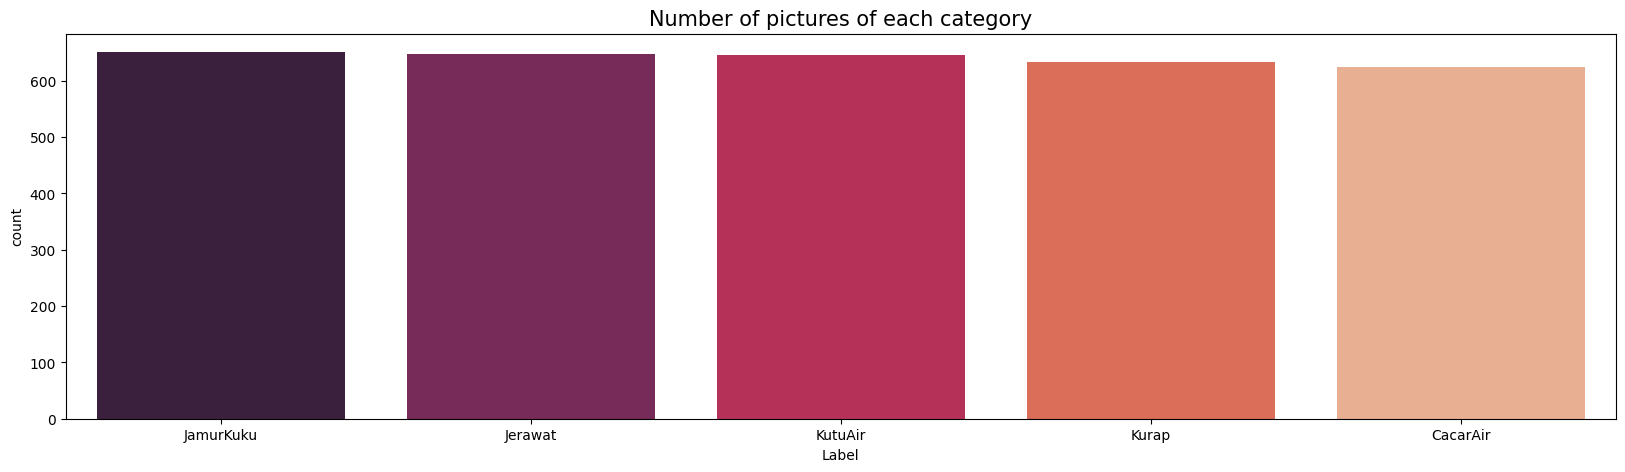

In [ ]:
# Display the number of pictures of each category
import seaborn as sns
vc = image_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [ ]:
#Shuffle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Separate in train and test data
train_df, validasi_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Inisialisasi ImageDataGenerator untuk data pelatihan dengan augmentasi
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    horizontal_flip=True
)

# Inisialisasi ImageDataGenerator untuk data validasi dan test tanpa augmentasi
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Membuat generator data pelatihan
train_data = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    seed=0,
    target_size=(416, 416),
    batch_size=16,
    shuffle=True,
    class_mode='categorical',
    subset='training'
)

# Membuat generator data validasi
validasi_data = val_datagen.flow_from_dataframe(
    dataframe=validasi_df,
    x_col='Filepath',
    y_col='Label',
    seed=0,
    target_size=(416, 416),
    batch_size=16,
    shuffle=False,
    class_mode='categorical'
)

# Membuat generator data test
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    seed=0,
    target_size=(416, 416),
    batch_size=16,
    shuffle=False,
    class_mode='categorical'
)


Found 2560 validated image filenames belonging to 5 classes.
Found 641 validated image filenames belonging to 5 classes.
Found 278 validated image filenames belonging to 5 classes.


Mapping nama kelas ke indeks kelas (train_data): {'CacarAir': 0, 'JamurKuku': 1, 'Jerawat': 2, 'Kurap': 3, 'KutuAir': 4}
Daftar kelas (train_data): [3, 4, 2, 1, 3, 1, 3, 4, 3, 0, 4, 1, 4, 3, 1, 0, 2, 0, 3, 1, 0, 0, 4, 0, 4, 2, 4, 2, 1, 3, 0, 0, 4, 2, 1, 0, 2, 4, 1, 4, 1, 2, 2, 3, 4, 3, 1, 4, 3, 4, 0, 3, 3, 3, 1, 1, 3, 4, 1, 2, 3, 3, 3, 3, 0, 2, 4, 2, 2, 2, 4, 3, 3, 4, 4, 1, 1, 1, 0, 3, 3, 1, 1, 1, 1, 4, 4, 1, 0, 2, 2, 2, 3, 4, 2, 0, 0, 4, 4, 1, 1, 2, 0, 0, 1, 1, 4, 4, 1, 4, 0, 2, 2, 4, 3, 3, 4, 2, 2, 2, 2, 3, 3, 4, 1, 0, 4, 3, 0, 2, 1, 3, 4, 3, 4, 4, 2, 1, 1, 2, 0, 1, 3, 1, 3, 4, 1, 3, 0, 4, 0, 4, 0, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 3, 4, 4, 0, 4, 1, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 4, 4, 1, 0, 4, 4, 3, 3, 1, 4, 1, 3, 4, 3, 4, 1, 0, 1, 1, 3, 0, 2, 0, 1, 0, 1, 3, 0, 3, 4, 3, 1, 2, 3, 2, 2, 4, 2, 2, 4, 3, 4, 2, 4, 4, 3, 4, 1, 0, 2, 1, 1, 3, 3, 2, 3, 2, 0, 0, 2, 1, 4, 1, 1, 1, 1, 4, 3, 4, 0, 2, 0, 1, 4, 4, 3, 2, 4, 2, 3, 0, 1, 2, 1, 2, 2, 0, 0, 2, 2, 3, 0, 1, 1, 3, 1, 3, 0, 0, 0, 2, 0, 3, 3,

In [ ]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2024-07-10 14:46:13--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.207, 74.125.135.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  52.8MB/s    in 1.6s    

2024-07-10 14:46:15 (52.8 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from keras import Model, Input
input_shape = (416,416,3)
model_input = Input(shape=input_shape)

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, ModelCheckpoint

# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (416, 416, 3),
                                include_top = False,
                                input_tensor=model_input,
                                weights = "imagenet")

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = True

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 416, 416, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 207, 207, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 207, 207, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 207, 207, 32)         0         ['batch_normalizati

In [ ]:
# Choose `mixed_7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed10')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 11, 11, 2048)


In [ ]:
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense  (5, activation='softmax')(x)

# Append the dense network to the base model
inception = Model(pre_trained_model.input, x)

# Print the model summary. See your dense network connected at the end.
inception.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 416, 416, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 207, 207, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 207, 207, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 207, 207, 32)         0         ['batch_normalization[0][0

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.05 and logs.get('val_accuracy') > 0.90):
      print("\Stopped, Akurasi mencapai 98%")
      self.model.stop_training = True;

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Tentukan path penyimpanan model
checkpoint_path = '/content/drive/MyDrive/ens2_inception/inception.h5'

# Buat callback ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='loss',  # Metrik yang akan dipantau
                                      save_best_only=True,  # Hanya menyimpan model terbaik
                                      save_weights_only=False,  # Menyimpan seluruh model
                                      mode='min',  # Mode pemantauan (misalnya, 'min', 'max', atau 'auto')
                                      verbose=1)  # Menampilkan pesan saat menyimpan

In [ ]:
from tensorflow.keras.optimizers import Adam
# Set the training parameters
callbacks= myCallback()
inception.compile(optimizer = Adam(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history_inception = inception.fit(
                  train_data,
                  validation_data=validasi_data,
                  steps_per_epoch=train_data.n/32,
                  validation_steps=validasi_data.n/32,
                  epochs=10,
                  callbacks=[callbacks, checkpoint_callback])


Epoch 1/10
80/80 [==============================] - ETA: 0s - loss: 2.8514 - accuracy: 0.4625
Epoch 1: loss improved from inf to 2.85139, saving model to /content/drive/MyDrive/ens2_inception/inception.h5


You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


80/80 [==============================] - 156s 1s/step - loss: 2.8514 - accuracy: 0.4625 - val_loss: 0.8062 - val_accuracy: 0.6815
Epoch 2/10
80/80 [==============================] - ETA: 0s - loss: 0.5887 - accuracy: 0.7820
Epoch 2: loss improved from 2.85139 to 0.58869, saving model to /content/drive/MyDrive/ens2_inception/inception.h5
80/80 [==============================] - 125s 2s/step - loss: 0.5887 - accuracy: 0.7820 - val_loss: 0.2872 - val_accuracy: 0.8929
Epoch 3/10
80/80 [==============================] - ETA: 0s - loss: 0.4278 - accuracy: 0.8477
Epoch 3: loss improved from 0.58869 to 0.42782, saving model to /content/drive/MyDrive/ens2_inception/inception.h5
80/80 [==============================] - 126s 2s/step - loss: 0.4278 - accuracy: 0.8477 - val_loss: 0.2778 - val_accuracy: 0.9018
Epoch 4/10
80/80 [==============================] - ETA: 0s - loss: 0.3109 - accuracy: 0.8922
Epoch 4: loss improved from 0.42782 to 0.31087, saving model to /content/drive/MyDrive/ens2_incept

In [ ]:
MODEL_BASE_PATH = "/content/drive/MyDrive/ens2_inception/"
PROJECT_NAME = "H5"
SAVE_MODEL_NAME = "ens_inceptionv.2.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))

print('Saving Model At {}...'.format(save_model_path))
inception.save(save_model_path,include_optimizer=False)

Saving Model At /content/drive/MyDrive/ens2_inception/H5/ens_inceptionv.2.h5...


In [ ]:
!pip3 install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 94.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 29.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
     

In [ ]:
!cd /content/drive/MyDrive/ens2_inception/
!tensorflowjs_converter --input_format=keras --output_format=tfjs_layers_model /content/drive/MyDrive/ens2_inception/ens_inceptionv.2.h5 /content/drive/MyDrive/ens2_inception/tfjs_inceptionv3

2024-06-05 13:58:10.266193: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
!zip -r /content/drive/MyDrive/tfjs_inceptionv3/tfjs_inceptionv3.zip  /content/drive/MyDrive/tfjs_inceptionv3/

  adding: content/drive/MyDrive/tfjs_inceptionv3/ (stored 0%)
  adding: content/drive/MyDrive/tfjs_inceptionv3/group1-shard1of263.bin (deflated 7%)
  adding: content/drive/MyDrive/tfjs_inceptionv3/group1-shard2of263.bin (deflated 7%)
  adding: content/drive/MyDrive/tfjs_inceptionv3/group1-shard3of263.bin (deflated 7%)
  adding: content/drive/MyDrive/tfjs_inceptionv3/group1-shard4of263.bin (deflated 7%)
  adding: content/drive/MyDrive/tfjs_inceptionv3/group1-shard5of263.bin (deflated 7%)
  adding: content/drive/MyDrive/tfjs_inceptionv3/group1-shard6of263.bin (deflated 7%)
  adding: content/drive/MyDrive/tfjs_inceptionv3/group1-shard7of263.bin (deflated 7%)
  adding: content/drive/MyDrive/tfjs_inceptionv3/group1-shard8of263.bin (deflated 7%)
  adding: content/drive/MyDrive/tfjs_inceptionv3/group1-shard9of263.bin (deflated 7%)
  adding: content/drive/MyDrive/tfjs_inceptionv3/group1-shard10of263.bin (deflated 7%)
  adding: content/drive/MyDrive/tfjs_inceptionv3/group1-shard11of263.bin (def

In [ ]:
#plotting
import matplotlib.pyplot as plt
def display_training_curves(training, validation, title, subplot):

    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.


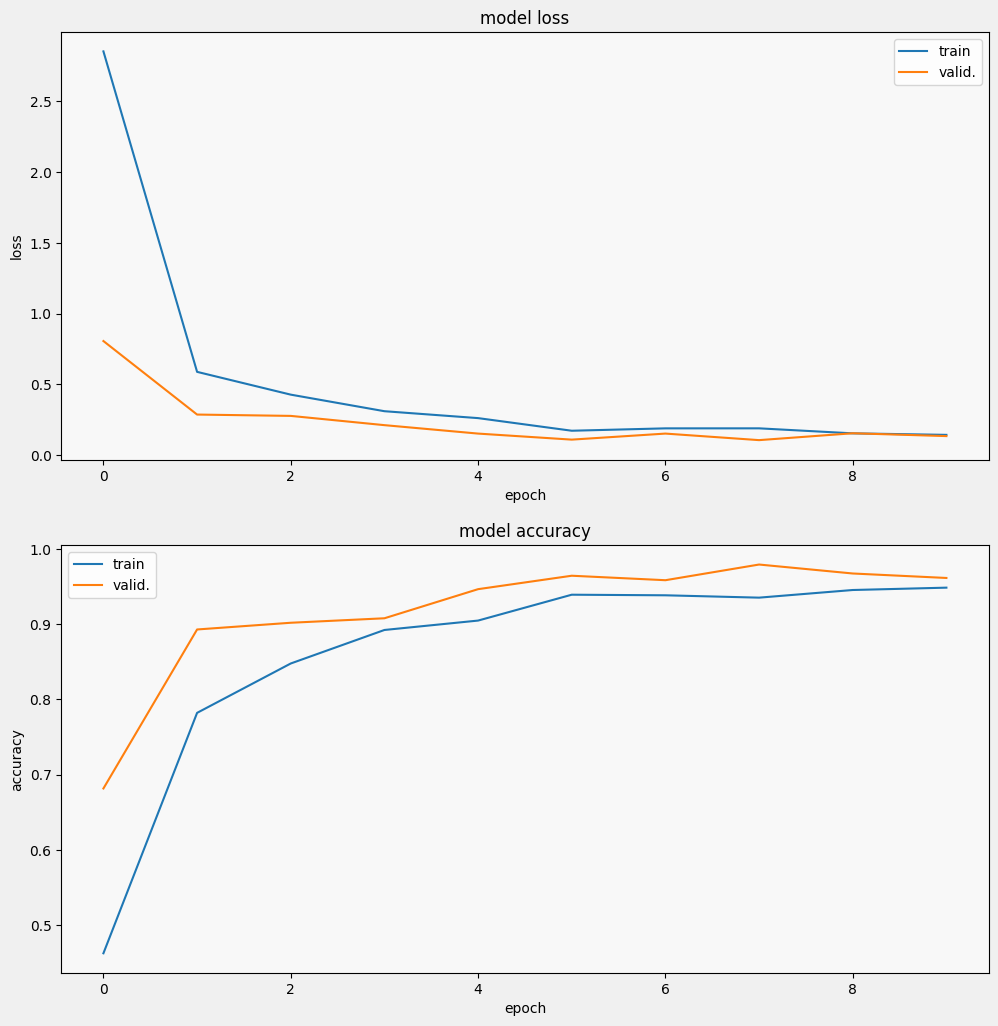

In [ ]:
#display
display_training_curves(
    history_inception.history['loss'],
    history_inception.history['val_loss'],
    'loss', 211)
display_training_curves(
    history_inception.history['accuracy'],
    history_inception.history['val_accuracy'],
    'accuracy', 212)

In [ ]:
# Predict the label of the test_images
import numpy as np
pred = inception.predict(test_generator)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

18/18 [==============================] - 2s 118ms/step
The first 5 predictions: ['Jerawat', 'CacarAir', 'Kurap', 'Kurap', 'CacarAir']


In [ ]:
#classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test = list(test_df.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    CacarAir       1.00      0.98      0.99        61
   JamurKuku       0.91      0.94      0.92        52
     Jerawat       0.98      0.94      0.96        53
       Kurap       0.95      0.95      0.95        58
     KutuAir       0.93      0.94      0.94        54

    accuracy                           0.95       278
   macro avg       0.95      0.95      0.95       278
weighted avg       0.95      0.95      0.95       278



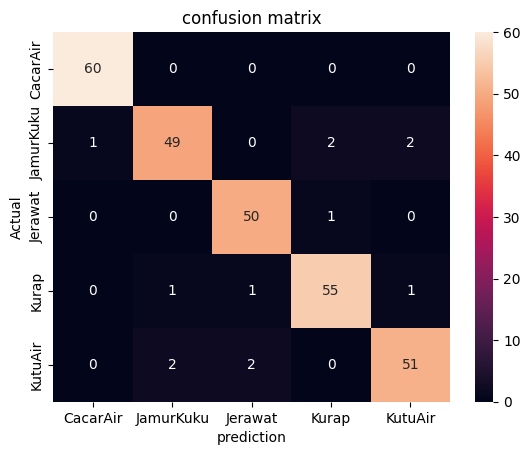

In [ ]:
import seaborn as sns
import pandas as pd
cm  = confusion_matrix(pred,y_test)
df_cm = pd.DataFrame(cm, index = [i for i in range(5)],
                  columns = [i for i in range(5)])
# sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels.values(), yticklabels=labels.values())
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

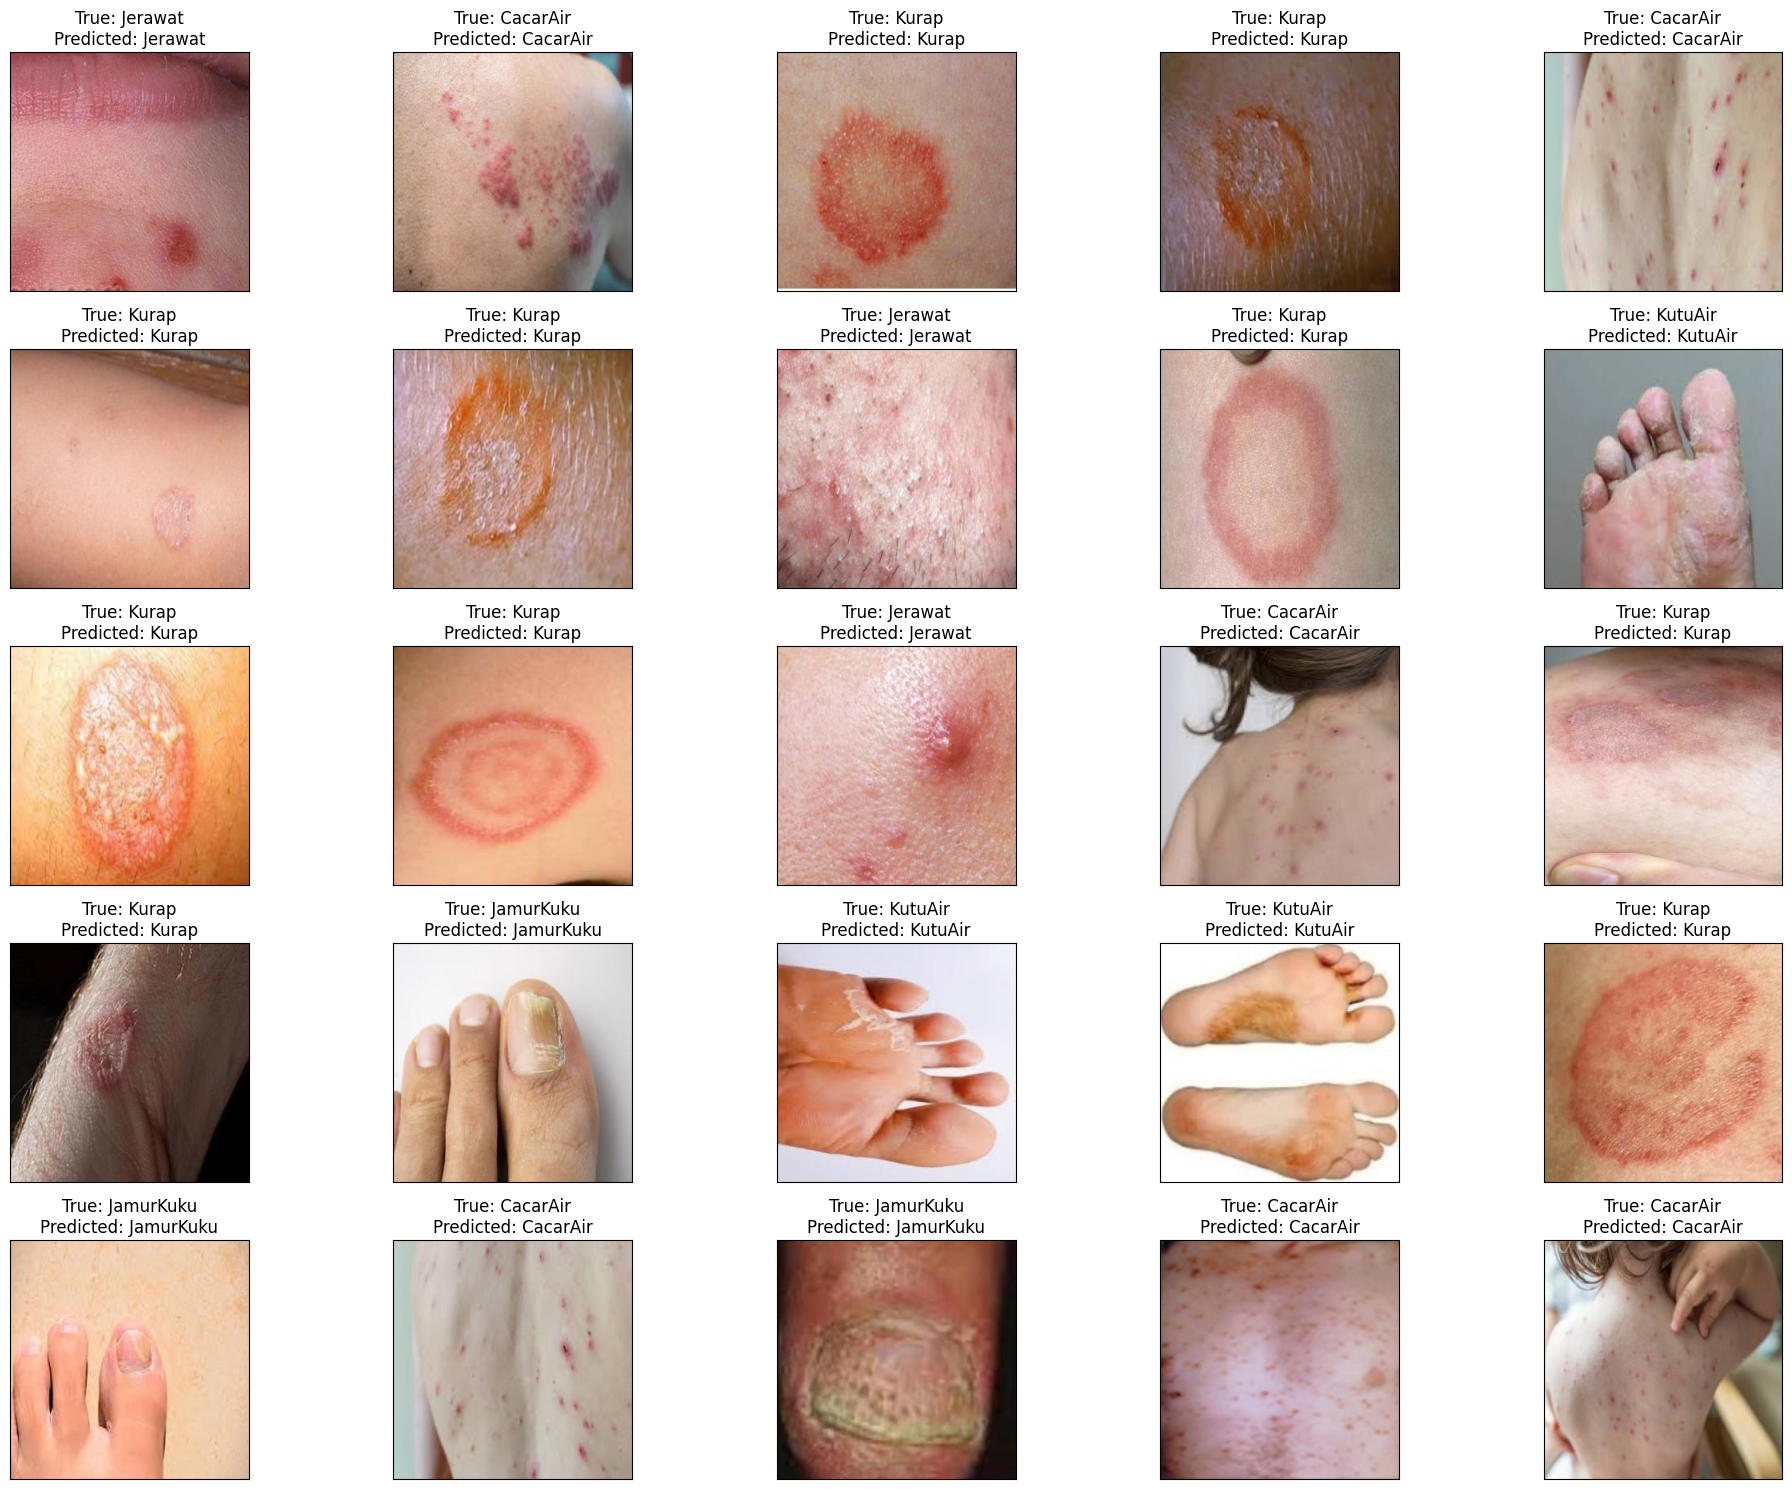

In [ ]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display

# Define class labels
class_labels = ['Cacar Air', 'Jamur Kuku', 'Jerawat', 'Kurap', 'Kutu Air']

def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(416, 416))  # Adjusted size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)
    return img_array

def predict_image(image_path):
    img_array = load_and_preprocess_image(image_path)
    single_prediction = inception.predict(img_array)  # Use the correct model
    predicted_class = np.argmax(single_prediction, axis=1)
    predicted_label = class_labels[predicted_class[0]]
    return predicted_label

# File upload widget
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)

def on_file_upload_change(change):
    for filename, file_info in upload_widget.value.items():
        with open(filename, 'wb') as f:
            f.write(file_info['content'])
        # Display the uploaded image
        img = image.load_img(filename, target_size=(416, 416))  # Adjusted size
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        # Make a prediction
        predicted_label = predict_image(filename)
        print(f"Predicted Label for {filename}: {predicted_label}")

upload_widget.observe(on_file_upload_change, names='value')
display(upload_widget)


ModuleNotFoundError: No module named 'tensorflow.keras.preprocessing'